In [3]:
##Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

#Import Dataset
print("Hello")
df=pd.read_csv(r"e:\research_review\algo/merge.csv")
df

Hello


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,443,88877518,7,10,643,1548,267,6,91.857143,120.637789,...,20,155303.0,101.823376,155375,155231,44283456.0,944819.1105,44951544,43615368,BENIGN
1048571,53,30944,2,2,60,414,30,30,30.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
1048572,53,217,2,2,68,484,34,34,34.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN
1048573,53,227,2,2,92,248,46,46,46.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN


PREPROCESS

In [21]:
df=df.iloc[:-1, :]

In [22]:
df.columns ##Print feature names 

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [10]:
df["Label"].value_counts() ##Filter

Label
BENIGN      759651
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64

In [23]:
#Custom label encoding
label_mapping={"BENIGN": 0, "DDoS": 1, "PortScan": 1, "Bot": 1}
# Use the dictionary to replace labels with their binary equivalents
df['Binary']=df['Label'].replace(label_mapping)
df["Binary"].value_counts()

C:\Users\Shankhadeep\AppData\Local\Temp\ipykernel_14220\2658870266.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Binary'] = df['Label'].replace(label_mapping)
C:\Users\Shankhadeep\AppData\Local\Temp\ipykernel_14220\2658870266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary'] = df['Label'].replace(label_mapping)


Binary
0    759651
1    288923
Name: count, dtype: int64

In [24]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,53,205,2,2,112,368,56,56,56.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
1048570,443,88877518,7,10,643,1548,267,6,91.857143,120.637789,...,155303.0,101.823376,155375,155231,44283456.0,944819.1105,44951544,43615368,BENIGN,0
1048571,53,30944,2,2,60,414,30,30,30.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0
1048572,53,217,2,2,68,484,34,34,34.000000,0.000000,...,0.0,0.000000,0,0,0.0,0.0000,0,0,BENIGN,0


In [25]:
df.isna().sum().sum() #Count number of Nan values

90

In [26]:
#Replace Nan and inf values with 0
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

In [27]:
df.isna().sum().sum() # Check if all Nan values are removed or not

0

In [28]:
#Finalize the dataset on which PSO algorithm will run
df=df.drop(['Label'],axis=1)
df=df.drop([' Fwd Header Length.1'],axis=1)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Binary
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,53,205,2,2,112,368,56,56,56.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.0000,0,0,0
1048570,443,88877518,7,10,643,1548,267,6,91.857143,120.637789,...,20,155303.0,101.823376,155375,155231,44283456.0,944819.1105,44951544,43615368,0
1048571,53,30944,2,2,60,414,30,30,30.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,0
1048572,53,217,2,2,68,484,34,34,34.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.0000,0,0,0


PSO(Particle Swarm Optimization)

Iteration: 1
Best (PSO): 0.008546286264526597
Iteration: 2
Best (PSO): 0.00788244844454377
Iteration: 3
Best (PSO): 0.007289746013571663
[ 1  2  4  6  8 12 14 15 17 18 19 20 21 23 24 26 27 29 33 34 35 36 48 49
 50 51 52 55 56 59 65 66 67 71 75]
Accuracy: 99.72279884160433
Feature Size: 35
--- 9741.59208893776  Train seconds ---


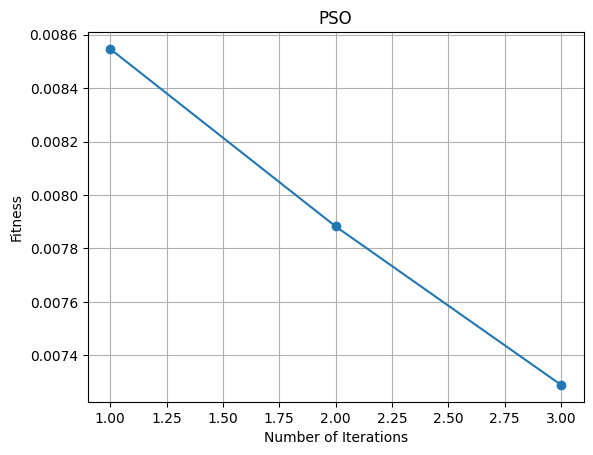

In [29]:


import time
start=time.time()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from FS.pso import jfs   # change this to switch algorithm
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import rand
from FS.functionHO import Fun

##
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()

    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]

    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()

    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub

    return x


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor

    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2']

    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')

    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim)

    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0

    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)

        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]

        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1

        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d])
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])


    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim)
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    print(sel_index)

    return pso_data

##

# load data
data  =df# pd.read_csv('corr.csv')
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])


# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 3   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts={'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl=jfs(feat, label, opts)
sf=fmdl['sf']

# model with selected features
num_train=np.size(xtrain, 0)
num_valid=np.size(xtest, 0)
x_train=xtrain[:, sf]
y_train=ytrain.reshape(num_train)  # Solve bug
x_valid=xtest[:, sf]
y_valid=ytest.reshape(num_valid)  # Solve bug

mdl= KNeighborsClassifier(n_neighbors = k)
mdl.fit(x_train, y_train)

# accuracy
y_pred= mdl.predict(x_valid)
Acc= np.sum(y_valid == y_pred)  / num_valid
print("Accuracy:", 100 * Acc)

# number of selected features
num_feat=fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve=fmdl['c']
curve=curve.reshape(np.size(curve,1))
x=np.arange(0, opts['T'], 1.0) + 1.0

fig,ax=plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
#plt.show()
print("--- %s  Train seconds ---" % (time.time() - start))

In [34]:
#Extract feature names from index
column_indices = [ 1 , 2  ,4 , 6 , 8 ,12 ,14 ,15 ,17 ,18 ,19 ,20 ,21 ,23 ,24 ,26 ,27 ,29, 33, 34, 35 ,36, 48 ,49,
 50, 51 ,52 ,55 ,56 ,59 ,65, 66, 67, 71, 75]
features = df.iloc[:, column_indices]

In [35]:
features

,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Max,...,Down/Up Ratio,Average Packet Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Bwd Avg Packets/Bulk,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Max,Idle Max
0,3,2,12,6,6.000000,0.0,4.000000e+06,666666.666700,0.000000e+00,3,...,0,9.000000,0,0,0,33,-1,1,0,0
1,109,1,6,6,6.000000,6.0,1.100917e+05,18348.623850,0.000000e+00,109,...,1,9.000000,0,0,0,29,256,0,0,0
2,52,1,6,6,6.000000,6.0,2.307692e+05,38461.538460,0.000000e+00,52,...,1,9.000000,0,0,0,29,256,0,0,0
3,34,1,6,6,6.000000,6.0,3.529412e+05,58823.529410,0.000000e+00,34,...,1,9.000000,0,0,0,31,329,0,0,0
4,3,2,12,6,6.000000,0.0,4.000000e+06,666666.666700,0.000000e+00,3,...,0,9.000000,0,0,0,32,-1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,205,2,112,56,56.000000,184.0,2.341463e+06,19512.195120,1.131607e+02,199,...,1,134.000000,0,0,0,-1,-1,1,0,0
1048570,88877518,7,643,267,91.857143,154.8,2.465190e+01,0.191274,1.512009e+07,44951544,...,1,144.529412,0,0,0,258,268,6,155375,44951544
1048571,30944,2,60,30,30.000000,207.0,1.531799e+04,129.265770,1.785946e+04,30937,...,1,126.000000,0,0,0,-1,-1,1,0,0
1048572,217,2,68,34,34.000000,242.0,2.543779e+06,18433.179720,1.200889e+02,211,...,1,146.500000,0,0,0,-1,-1,1,0,0


In [36]:
features.columns

Index([' Flow Duration', ' Total Fwd Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Min', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Bwd Avg Packets/Bulk', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' Active Max',
       ' Idle Max'],
      dtype='object')

TC(Threshold Correlation)

In [39]:
import time
start=time.time()
threshold=0.5
threshold=float(threshold)

def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    print(len(col_corr))
    return col_corr
y=correlation(features, threshold)
print(y)
x=list(features.columns)
x=set(x)
print(len(x-y))
print("printing unique features")
print(x-y)

z = x-y

for i in x:
    if i not in z:
        df.drop([i], axis=1)

print("--- %s  Train seconds ---" % (time.time() - start))

15
{' Bwd IAT Std', ' Fwd IAT Max', ' Average Packet Size', ' Fwd IAT Mean', 'Total Length of Fwd Packets', ' act_data_pkt_fwd', 'Fwd Packets/s', 'Fwd IAT Total', ' Fwd IAT Min', ' Fwd Packet Length Mean', ' Bwd IAT Mean', ' Idle Max', ' Flow IAT Std', ' Bwd IAT Min', ' Flow IAT Max'}
20
printing unique features
{' Fwd Header Length', ' Bwd Header Length', ' Down/Up Ratio', ' Fwd Packet Length Max', ' Flow Duration', ' Flow Packets/s', ' URG Flag Count', ' Fwd Avg Packets/Bulk', ' Bwd URG Flags', ' CWE Flag Count', ' Bwd Packet Length Mean', ' ECE Flag Count', ' Flow IAT Min', ' Bwd Avg Packets/Bulk', ' Init_Win_bytes_backward', 'Fwd Avg Bytes/Bulk', 'Init_Win_bytes_forward', ' Active Max', 'Flow Bytes/s', ' Total Fwd Packets'}
--- 6.487284898757935  Train seconds ---


In [4]:
#Import The main large dataset that constains all types of attack
df1=pd.read_csv(r"g:\GeneratedLabelledFlows\MachineLearningCSV\MachineLearningCVE/merge.csv")
df1=df1.iloc[:-1,1:]

C:\Users\Shankhadeep\AppData\Local\Temp\ipykernel_1132\4073068899.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r"g:\GeneratedLabelledFlows\MachineLearningCSV\MachineLearningCVE/merge.csv")


In [5]:

df2=df1.drop(['Fwd Header Length.1','Label'],axis=1)
df2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Binary
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300820,53,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300821,53,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300822,58030,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300823,53,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df2.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [7]:
x=[' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min',
       'Label']

In [8]:
df2.columns=x
df2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300820,53,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300821,53,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300822,58030,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2300823,53,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
column_indices = [ ' Fwd Header Length', ' Bwd Header Length', ' Down/Up Ratio', ' Fwd Packet Length Max', 
                  ' Flow Duration', ' Flow Packets/s', ' URG Flag Count', ' Fwd Avg Packets/Bulk', 
                  ' Bwd URG Flags', ' CWE Flag Count', ' Bwd Packet Length Mean', ' ECE Flag Count', 
                  ' Flow IAT Min', ' Bwd Avg Packets/Bulk', ' Init_Win_bytes_backward', 'Fwd Avg Bytes/Bulk', 
                  'Init_Win_bytes_forward', ' Active Max', 'Flow Bytes/s', ' Total Fwd Packets']
df2 = df2.loc[:, column_indices]

In [10]:
df2.columns

Index([' Fwd Header Length', ' Bwd Header Length', ' Down/Up Ratio',
       ' Fwd Packet Length Max', ' Flow Duration', ' Flow Packets/s',
       ' URG Flag Count', ' Fwd Avg Packets/Bulk', ' Bwd URG Flags',
       ' CWE Flag Count', ' Bwd Packet Length Mean', ' ECE Flag Count',
       ' Flow IAT Min', ' Bwd Avg Packets/Bulk', ' Init_Win_bytes_backward',
       'Fwd Avg Bytes/Bulk', 'Init_Win_bytes_forward', ' Active Max',
       'Flow Bytes/s', ' Total Fwd Packets'],
      dtype='object')

MACHINE LEARNING MODEL

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.fillna(0)

In [13]:
df_x =df2 
df_y =df1["Binary"]
df_x

,Fwd Header Length,Bwd Header Length,Down/Up Ratio,Fwd Packet Length Max,Flow Duration,Flow Packets/s,URG Flag Count,Fwd Avg Packets/Bulk,Bwd URG Flags,CWE Flag Count,Bwd Packet Length Mean,ECE Flag Count,Flow IAT Min,Bwd Avg Packets/Bulk,Init_Win_bytes_backward,Fwd Avg Bytes/Bulk,Init_Win_bytes_forward,Active Max,Flow Bytes/s,Total Fwd Packets
0,40.0,0.0,0.0,6.0,3.0,666666.666700,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,33.0,0.0,4.000000e+06,2.0
1,20.0,20.0,1.0,6.0,109.0,18348.623850,1.0,0.0,0.0,0.0,6.0,0.0,109.0,0.0,256.0,0.0,29.0,0.0,1.100917e+05,1.0
2,20.0,20.0,1.0,6.0,52.0,38461.538460,1.0,0.0,0.0,0.0,6.0,0.0,52.0,0.0,256.0,0.0,29.0,0.0,2.307692e+05,1.0
3,20.0,20.0,1.0,6.0,34.0,58823.529410,1.0,0.0,0.0,0.0,6.0,0.0,34.0,0.0,329.0,0.0,31.0,0.0,3.529412e+05,1.0
4,40.0,0.0,0.0,6.0,3.0,666666.666700,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,32.0,0.0,4.000000e+06,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300820,80.0,64.0,0.0,28.0,32215.0,186.248642,0.0,0.0,0.0,0.0,76.0,0.0,3.0,0.0,-1.0,0.0,-1.0,0.0,8.194940e+03,4.0
2300821,40.0,40.0,1.0,42.0,324.0,12345.679010,0.0,0.0,0.0,0.0,181.0,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,1.376543e+06,2.0
2300822,64.0,20.0,0.0,31.0,82.0,36585.365850,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,1006.0,0.0,4.512195e+05,2.0
2300823,120.0,40.0,0.0,32.0,1048635.0,7.628965,0.0,0.0,0.0,0.0,128.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,4.272221e+02,6.0


In [14]:
# Compute the correlation matrix
correlation_matrix = df2.corr()


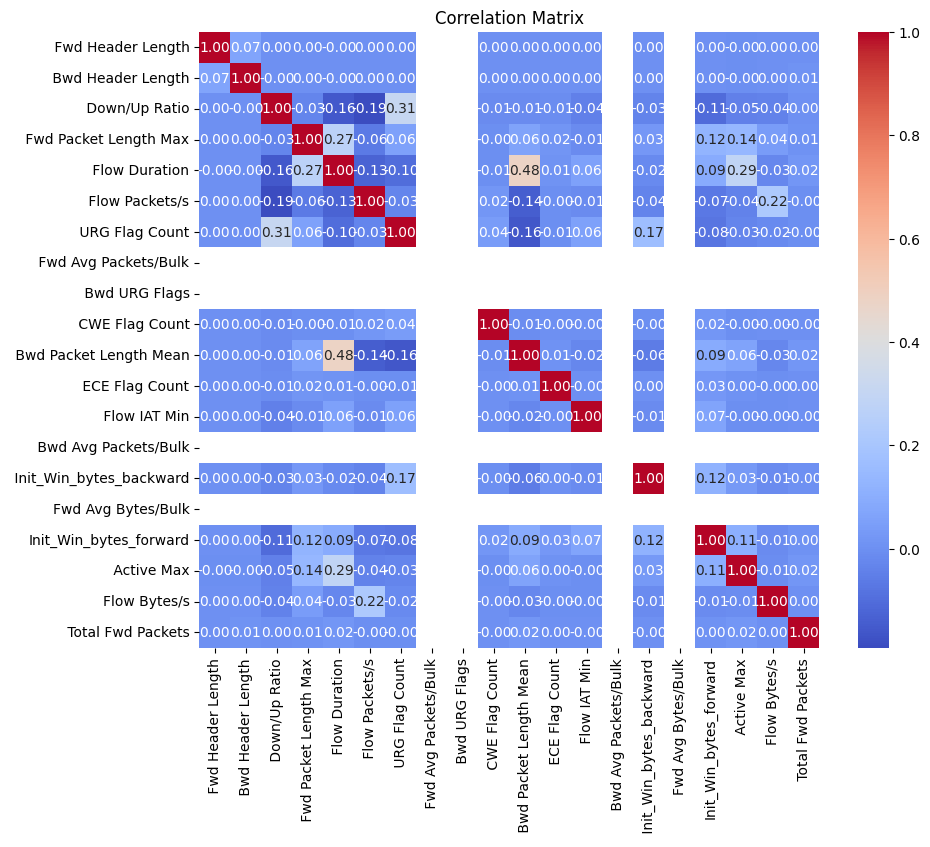

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_y

0          0
1          0
2          0
3          0
4          0
          ..
2300820    0
2300821    0
2300822    0
2300823    0
2300824    0
Name: Binary, Length: 2300825, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)
###################### .values.ravel()


BINARY CLASSIFICATION

In [ ]:
print("Forest")
rf = RandomForestClassifier()
start_time = time.time()
rf.fit(x_train, y_train.values.ravel())
print("--- %s  Train seconds ---" % (time.time() - start_time))
start_time = time.time()
y_pred = rf.predict(x_test)
print("--- %s  Test seconds ---" % (time.time() - start_time))
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, digits=6))

Forest
--- 339.2029433250427  Train seconds ---
--- 3.564521312713623  Test seconds ---
Accuracy: 99.86%
              precision    recall  f1-score   support

           0   0.999366  0.998799  0.999083    348932
           1   0.996240  0.998013  0.997126    111233

    accuracy                       0.998609    460165
   macro avg   0.997803  0.998406  0.998104    460165
weighted avg   0.998611  0.998609  0.998610    460165



Decision Tree Is Taken into consideration as it has less testing time and more good accuracy

In [ ]:
print("Tree")
dt = DecisionTreeClassifier()
start_time=time.time()
dt.fit(x_train, y_train.values.ravel())
print("--- %s  Train seconds ---" % (time.time() - start_time))
start_time = time.time()
y_pred = dt.predict(x_test)
print(y_pred)
print("--- %s  Test seconds ---" % (time.time() - start_time))
#x=pd.DataFrame(y_pred)
#x.to_csv('D:/pred1.csv',index=False)
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, digits=6))

Tree
--- 19.84754705429077  Train seconds ---
[0 0 0 ... 0 1 0]
--- 0.08757829666137695  Test seconds ---
Accuracy: 99.83%
              precision    recall  f1-score   support

           0   0.999254  0.998552  0.998903    348757
           1   0.995477  0.997666  0.996570    111408

    accuracy                       0.998338    460165
   macro avg   0.997366  0.998109  0.997737    460165
weighted avg   0.998340  0.998338  0.998338    460165



In [ ]:
import pickle
with open('DT_pickle.pkl', 'wb') as file:
    pickle.dump(dt, file)

MULTI CLASSIFICATION

In [ ]:
df_y =df1["Label"]
df_y.value_counts()

Label
BENIGN                        1743179
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Assuming df2 is your DataFrame and 'Column_Name' is the column you want to encode
# Replace 'Column_Name' with the actual name of the column you want to encode
column_to_encode = df1['Label']

# Fit LabelEncoder and transform the column
encoded_column = label_encoder.fit_transform(column_to_encode)

# Replace the original column with the encoded column in your DataFrame
df1['Label'] = encoded_column


In [ ]:
df_y =df1["Label"]
df_y.value_counts()

Label
0     1743179
4      231073
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: count, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [ ]:
from catboost import CatBoostClassifier
print("CATBoost")
dt =CatBoostClassifier()
start_time = time.time()
dt.fit(x_train, y_train)
print("--- %s  Train seconds ---" % (time.time() - start_time))
start_time = time.time()
y_pred = dt.predict(x_test)
print("--- %s  Test seconds ---" % (time.time() - start_time))
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, digits=6))

CATBoost
Learning rate set to 0.116101
0:	learn: 1.3596060	total: 1.95s	remaining: 32m 23s
1:	learn: 1.0859381	total: 3.72s	remaining: 30m 55s
2:	learn: 0.9054605	total: 6.07s	remaining: 33m 36s
3:	learn: 0.7716893	total: 8.33s	remaining: 34m 33s
4:	learn: 0.6684443	total: 10.4s	remaining: 34m 39s
5:	learn: 0.5852713	total: 12.1s	remaining: 33m 32s
6:	learn: 0.5175303	total: 13.8s	remaining: 32m 39s
7:	learn: 0.4589287	total: 15.5s	remaining: 32m 1s
8:	learn: 0.4112694	total: 17.3s	remaining: 31m 43s
9:	learn: 0.3660135	total: 19.1s	remaining: 31m 26s
10:	learn: 0.3308414	total: 20.9s	remaining: 31m 17s
11:	learn: 0.2975185	total: 22.5s	remaining: 30m 56s
12:	learn: 0.2697305	total: 24.2s	remaining: 30m 38s
13:	learn: 0.2447823	total: 25.9s	remaining: 30m 24s
14:	learn: 0.2230575	total: 27.6s	remaining: 30m 9s
15:	learn: 0.2050677	total: 29.3s	remaining: 29m 59s
16:	learn: 0.1891093	total: 30.9s	remaining: 29m 48s
17:	learn: 0.1745212	total: 32.6s	remaining: 29m 38s
18:	learn: 0.162019

In [ ]:
import pickle
with open('catboost_pickle.pkl', 'wb') as file:
    pickle.dump(dt, file)